In [107]:
import pandas as pd
x = pd.read_csv("../x-moreRounds2.csv")
x = x.drop("Unnamed: 0",axis=1)




In [86]:
# y = pd.read_csv("../y_ready2.csv")
# y = y.drop("Unnamed: 0",axis=1)


In [108]:
x

,0,consumption_lag_1,consumption_lag_10,consumption_lag_20,consumption_lag_50,consumption_lag_100,consumption_lag_120,rolling_std2,rolling_std3
0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,0.000000,0.000000
1,180.0,180.0,180.0,180.0,180.0,180.0,180.0,0.000000,0.000000
2,180.0,180.0,180.0,180.0,180.0,180.0,180.0,0.000000,0.000000
3,181.0,180.0,180.0,180.0,180.0,180.0,180.0,0.707107,0.577350
4,180.0,181.0,180.0,180.0,180.0,180.0,180.0,0.707107,0.577350
...,...,...,...,...,...,...,...,...,...
22509355,366.5,378.0,426.0,425.0,378.5,345.0,357.5,8.131728,5.965177
22509356,376.0,366.5,437.5,426.5,379.0,341.0,338.0,6.717515,6.144103
22509357,367.0,376.0,421.0,431.0,435.5,340.0,340.5,6.363961,5.346338
22509358,353.0,367.0,421.0,439.5,476.0,340.0,342.0,9.899495,11.590226


In [109]:
import gc
gc.collect()

6603

In [112]:
import xgboost as xgb
from sklearn.metrics import average_precision_score
from sklearn.model_selection import train_test_split
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3,random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3,shuffle=False)


dtrain = xgb.DMatrix(X_train,label=y_train)
dtest = xgb.DMatrix(X_test,label=y_test)

model = xgb.XGBModel(n_estimators=150)
params = {
    'max_depth': 10,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'map',
    'booster':'gbtree',
    'normalize_type':'forest',
    'learning_rate':0.4,
    'tree_method':'gpu_hist',
    'n_jobs':500,
    'colsample_bytree':0.8,
    'gamma':0.4,
    'subsample':0.8
}

# Train model
evalist = [(dtrain, 'train'), (dtest, 'eval')]
model = xgb.train(params, dtrain,num_boost_round=250,verbose_eval=1,evals=evalist)

preds = model.predict(dtest) #Predictions
y_test = y_test.astype(float)
optimal_num_boost_round = model.best_iteration

print("Precision = {}".format(average_precision_score(y_test.values, preds, average='macro')))
# print("Precision = {}".format(average_precision_score(y_test.values, preds, average='micro')))










# [119]	train-map:0.77366	eval-map:0.7
# Precision = 0.59


#0.78 precision with lag 1 10 20 50 100 150 200  with shuffle

# Precision = 0.37477380159945267 with shuffle (improvement with reduced lag [1,10,20,40,70,100,120] previous :0.36)
# listI = [1,10,20,30,40,50,60] Precision = 0.677177963076758
# [1,5,10,20,30,40,60] train-map:0.79443 eval-map:0.73081   Precision = 0.6709892396388677
# [119]	listI = [1,10,20,50,100,120] and std2 3 Precision = 0.707854318966458



[18:04:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "normalize_type" } are not used.

[0]	train-map:0.61586	eval-map:0.61183
[1]	train-map:0.65222	eval-map:0.64796
[2]	train-map:0.66091	eval-map:0.65588
[3]	train-map:0.67036	eval-map:0.66484
[4]	train-map:0.67638	eval-map:0.67002
[5]	train-map:0.68199	eval-map:0.67491
[6]	train-map:0.68853	eval-map:0.68081
[7]	train-map:0.69317	eval-map:0.68475
[8]	train-map:0.69770	eval-map:0.68841
[9]	train-map:0.70136	eval-map:0.69152
[10]	train-map:0.70521	eval-map:0.69468
[11]	train-map:0.70819	eval-map:0.69693
[12]	train-map:0.71135	eval-map:0.69944
[13]	train-map:0.71390	eval-map:0.70136
[14]	train-map:0.71767	eval-map:0.70440
[15]	train-map:0.71946	eval-map:0.70568
[16]	train-map:0.72273	eval-map:0.70832
[17]	train-map:0.72360	eval-map:0.70865
[18]	train-map:0.72621	eval-map:0.71076
[19]	train-map:0.72871	eval-map:0.71281
[20]	t

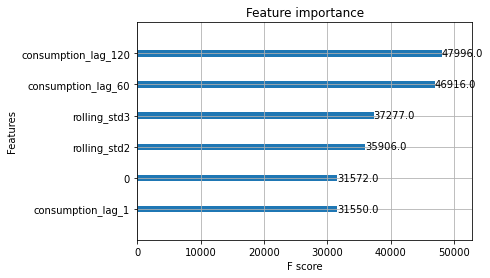

In [101]:
import matplotlib.pyplot as plt
xgb.plot_importance(model)
plt.show()

In [102]:
x

,0,consumption_lag_1,consumption_lag_60,consumption_lag_120,rolling_std2,rolling_std3
0,180.0,180.0,180.0,180.0,0.000000,0.000000
1,180.0,180.0,180.0,180.0,0.000000,0.000000
2,180.0,180.0,180.0,180.0,0.000000,0.000000
3,181.0,180.0,180.0,180.0,0.707107,0.577350
4,180.0,181.0,180.0,180.0,0.707107,0.577350
...,...,...,...,...,...,...
22509355,366.5,378.0,325.0,357.5,8.131728,5.965177
22509356,376.0,366.5,322.0,338.0,6.717515,6.144103
22509357,367.0,376.0,322.0,340.5,6.363961,5.346338
22509358,353.0,367.0,403.0,342.0,9.899495,11.590226


In [7]:
dfxTest= pd.read_csv("../dfTest_transposed_notNormalized.csv")
dfxTest = dfxTest.drop('Unnamed: 0',axis = 1)
listI = [1,10,20,50,100,150,200]

for i in listI:
    dfxTest[f'consumption_lag_{i}'] = dfxTest['0'].shift(i)
dfxTest = dfxTest.fillna(method='bfill')


In [103]:
dfxTest= pd.read_csv("../test-MoreRounds.csv")


In [104]:
# dfxTest = dfxTest.drop('Unnamed: 0.1',axis=1)
dfxTest = dfxTest.drop('Unnamed: 0',axis=1)



In [94]:
dfxTest

,0,consumption_lag_1,consumption_lag_10,consumption_lag_20,consumption_lag_60,consumption_lag_100,consumption_lag_120,consumption_lag_110,consumption_lag_90,rolling_std2,rolling_std3
0,595.0,595.0,595.0,595.0,595.0,595.0,595.0,595.0,595.0,0.000000,3.464102
1,595.0,595.0,595.0,595.0,595.0,595.0,595.0,595.0,595.0,0.000000,3.464102
2,601.0,595.0,595.0,595.0,595.0,595.0,595.0,595.0,595.0,4.242641,3.464102
3,592.0,601.0,595.0,595.0,595.0,595.0,595.0,595.0,595.0,6.363961,4.582576
4,592.0,592.0,595.0,595.0,595.0,595.0,595.0,595.0,595.0,0.000000,5.196152
...,...,...,...,...,...,...,...,...,...,...,...
5374075,1789.0,1789.0,1789.0,1789.0,1789.0,1789.0,1789.0,1789.0,1789.0,0.000396,0.000362
5374076,1789.0,1789.0,1789.0,1789.0,1789.0,1789.0,1789.0,1789.0,1789.0,0.000396,0.000362
5374077,1789.0,1789.0,1789.0,1789.0,1789.0,1789.0,1789.0,1789.0,1789.0,0.000396,0.000362
5374078,1789.0,1789.0,1789.0,1789.0,1789.0,1789.0,1789.0,1789.0,1789.0,0.000396,0.000362


In [105]:
dFin = xgb.DMatrix(dfxTest)

preds_f = model.predict(dFin)

dfF = pd.DataFrame(preds_f, columns=["Washing Machine","Dishwasher","Tumble Dryer","Microwave","Kettle"])
dfF = dfF.rename_axis('Index')
dfF = dfF.round(4)


In [106]:
dfF.to_csv("../donthope2.csv")
